# Flight Prices Analysis (Apr–Oct 2022): An Exploratory Data Report

##  Introduction

his report presents an Exploratory Data Analysis (EDA) on a dataset of domestic flight prices in the United States collected between April and October 2022. The goal is to investigate how **flight prices are influenced by the day of the week** and **the time of day** ( morning, afternoon, evening, night).

>  **Note**: This dataset shows **purchasable flights** , not actual booked flights. The data shows flights that were available for booking at a given time and price.

The dataset source:  
🔗 [Flight Prices Dataset - Kaggle](https://www.kaggle.com/datasets/dilwong/flightprices)

### Key Questions:
- Do flight prices vary depending on the **periods of the day** (morning, afternoon, evening, night)?
- Do flight prices vary depending on the **day of the week**?
- Are ticket prices affected by **seats remaining** or **number of flights offered** on a given day?

Throughout this notebook, we will clean the data, explore variable distributions, visualize trends, and review findings that may assist travelers and airline analysts better understand pricing behaviors.


## Objectives

This analysis aims to uncover patterns in flight pricing by examining the following:

- How do ticket prices vary across different **days of the week**?
- Are there specific **times of day** (morning, afternoon, evening, night) when ticket prices are higher or lower?
- Is there any correlation between the **number of remaining seats** and the **ticket price**?
- Does the **number of flights offered** per day influence the ticket price?

The findings may assist travelers find ideal booking times and support better pricing strategies.

## Importing libraries for data analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Load the dataset
For performance reasons, only the **first 1,000,000 rows** were loaded and analyzed in this report using the `nrows` in pandas.

In [3]:
df = pd.read_csv("Flights.csv", nrows=1000000)
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,f6c207e75c1cc61bcda3636606a6118c,2022-04-18,2022-05-30,ORD,SFO,MAA0OKEY,PT4H32M,0,False,False,...,1653949020,2022-05-30T15:17:00.000-07:00,SFO,ORD,United,UA,Boeing 787-8,16320,1847,coach
999996,de6456e27327c6698afe5853739221d3,2022-04-18,2022-05-30,ORD,SFO,MAA0OKEY,PT4H46M,0,False,False,...,1653970260,2022-05-30T21:11:00.000-07:00,SFO,ORD,United,UA,Boeing 737-900,17160,1847,coach
999997,06478f81a4dbdc84faab635a6efbd8d8,2022-04-18,2022-05-30,ORD,SFO,BAA0AFEN,PT4H45M,0,False,False,...,1653955500,2022-05-30T17:05:00.000-07:00,SFO,ORD,United,UA,Boeing 737-900,17100,1847,premium coach
999998,a1d867a12c631f41562ec88e4fbe9f1c,2022-04-18,2022-05-30,ORD,SFO,YAA0AFEY,PT4H37M,0,False,False,...,1653929220,2022-05-30T09:47:00.000-07:00,SFO,ORD,United,UA,Boeing 737-900,16620,1847,coach


## Data Exploration

### 1. Dataset Overview


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype              
---  ------                             --------------    -----              
 0   legId                              1000000 non-null  object             
 1   searchDate                         1000000 non-null  object             
 2   flight_date                        1000000 non-null  datetime64[ns, UTC]
 3   startingAirport                    1000000 non-null  object             
 4   destinationAirport                 1000000 non-null  object             
 5   fareBasisCode                      1000000 non-null  object             
 6   travelDuration                     1000000 non-null  object             
 7   elapsedDays                        1000000 non-null  int64              
 8   isBasicEconomy                     1000000 non-null  bool               
 9   isRefundable             

### 2. View Sample Rows

In [12]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


### 3. View Columns Names

In [108]:
df.columns

Index(['legId', 'searchDate', 'flight_date', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'price',
       'seats_remaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'departure_time',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'departure_period',
       'flight_day_name'],
      dtype='object')

### 4. Check data type

In [13]:
print(df.dtypes)

legId                                 object
searchDate                            object
flightDate                            object
startingAirport                       object
destinationAirport                    object
fareBasisCode                         object
travelDuration                        object
elapsedDays                            int64
isBasicEconomy                          bool
isRefundable                            bool
isNonStop                               bool
baseFare                             float64
totalFare                            float64
seatsRemaining                         int64
totalTravelDistance                  float64
segmentsDepartureTimeEpochSeconds     object
segmentsDepartureTimeRaw              object
segmentsArrivalTimeEpochSeconds       object
segmentsArrivalTimeRaw                object
segmentsArrivalAirportCode            object
segmentsDepartureAirportCode          object
segmentsAirlineName                   object
segmentsAi

### 5. Check for Missing Values

In [107]:
df.isnull().sum()

legId                                    0
searchDate                               0
flight_date                              0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
price                                    0
seats_remaining                          0
totalTravelDistance                  61860
segmentsDepartureTimeEpochSeconds        0
departure_time                           0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

## Data Cleaning

### 1. Columns Renaming

In [4]:
df = df.rename(columns={
    'flightDate': 'flight_date',
    'segmentsDepartureTimeRaw': 'departure_time',
    'totalFare': 'price',
    'seatsRemaining': 'seats_remaining'})

### 2. Missing Values cleaning

The columns relevant to the analysis — legId, price, seats_remaining, departure_time and flight_date were found to be complete, with no missing data. Therefore, no rows were dropped at this stage.


### 3. Date and Time Formatting

#### 3.1 Time formating

 ##### 3.1.1  Previewing Departure Time Values

In [38]:
print(df['departure_time'].head(10)) 

0                        2022-04-17T12:57:00.000-04:00
1                        2022-04-17T06:30:00.000-04:00
2                        2022-04-17T11:35:00.000-04:00
3                        2022-04-17T13:59:00.000-04:00
4                        2022-04-17T09:59:00.000-04:00
5                        2022-04-17T10:45:00.000-04:00
6    2022-04-17T08:20:00.000-04:00||2022-04-17T10:2...
7    2022-04-17T08:20:00.000-04:00||2022-04-17T11:2...
8    2022-04-17T07:00:00.000-04:00||2022-04-17T10:2...
9    2022-04-17T07:00:00.000-04:00||2022-04-17T11:2...
Name: departure_time, dtype: object


It is observed that some date-time fields contain multiple timestamps separated by delimiters such as ||

##### 3.1.2 Cleaning Departure Time Format by extracting the First Departure Time Value

In [91]:
df['departure_time'] = df['departure_time'].astype(str).str.split(r'\|\|').str[0]

##### 3.1.3 Checking unique departure time values to make sure values are all clean and consisten

In [92]:
print(df['departure_time'].unique())

['2022-04-17 12:57:00-04:00' '2022-04-17 06:30:00-04:00'
 '2022-04-17 11:35:00-04:00' ... '2022-05-30 08:47:00-05:00'
 '2022-05-30 17:20:00-05:00' '2022-05-30 10:05:00-05:00']


##### 3.1.4 Verifying Removal of Separator

In [93]:
df['departure_time'].str.contains(r'\|\|').sum()

np.int64(0)

##### 3.1.5 Converting Departure Time to DateTime Format

In [18]:
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1704\999903754.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')


##### 3.1.6 Categorizing Departure Times into Periods of the Day / adding a new column called time_period

In [110]:
def time_period(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['departure_period'] = df['departure_time'].apply(time_period)

##### 3.1.7  Randomly check if departure times have been correctly categorized

In [20]:
print(df[['departure_time', 'departure_period']].sample(10))

                   departure_time departure_period
396779  2022-05-22 12:46:00-05:00        Afternoon
485249  2022-06-01 08:38:00-07:00          Morning
567827  2022-06-10 10:55:00-04:00          Morning
973776  2022-05-27 08:00:00-04:00          Morning
11496   2022-04-18 16:53:00-04:00        Afternoon
323689  2022-05-13 13:35:00-04:00        Afternoon
472520  2022-05-31 14:46:00-04:00        Afternoon
433961  2022-05-26 19:32:00-04:00          Evening
356050  2022-05-17 14:00:00-04:00        Afternoon
262282  2022-05-07 07:11:00-05:00          Morning


##### 3.1.8 checking if there is any missing data after the conversion


In [96]:
df[df['flight_date'].isna()]

,legId,searchDate,flight_date,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,departure_period,flight_day_name


#### 3.2 Date formatting

##### 3.2.1 Convert the "flight_date" column to datetime type with error handling

In [113]:
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce', utc=True)

##### 3.2.2 Create a new column with the day name extracted from the flight date

In [114]:
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce', utc=True)

##### 3.2.3. Print  unique values in the "flight_day_name" column to check if it works

In [115]:
df['flight_day_name'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

## Data Analysis

### Analyze the relationship between flight departure time and flight price

#### 1. Statistical Summary of Ticket Prices by Departure Period

In [125]:
df.groupby('departure_period')['price'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean')

,mean,median,std,count
departure_period,,,,
Evening,329.094160,278.60,238.179274,149849
Afternoon,341.311304,300.71,232.290589,268228
Morning,354.899846,317.60,238.703284,499936
Night,379.435147,354.01,219.753332,81987


Flights were grouped based on departure periods (Morning, Afternoon, Evening, Night), and the mean and median prices for each period were calculated.
The results indicate that Night flights tend to be the most expensive, while Evening flights are generally more affordable.
The high standard deviation indicates that factors other than departure time sometimes cause large variations in flight prices.

#### 2. Flight Price Distribution by Departure Time

Text(0, 0.5, 'Price')

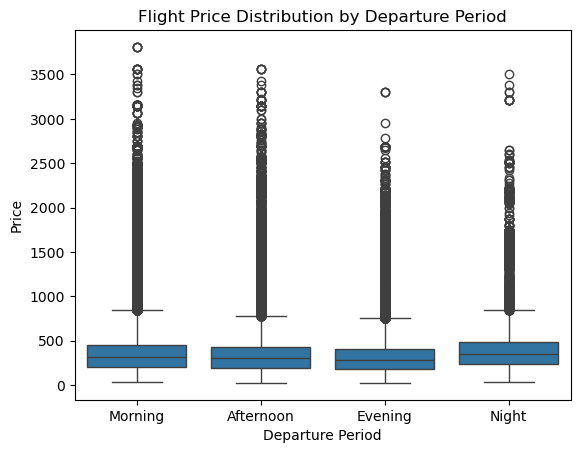

In [124]:
sns.boxplot(x='departure_period', y='price', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Flight Price Distribution by Departure Period')
plt.xlabel('Departure Period')
plt.ylabel('Price')

From the plot, it is clear that **Night flights tend to have higher median prices** compared to other periods, while **Evening flights generally have lower prices**. The wide boxes and presence of outliers indicate notable price variability within each period.



### Analyze the relationship between week days and flight price

#### 1. Statistical Summary of Ticket Prices by week days

In [119]:
weekday_summary = df.groupby('flight_day_name')['price'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean')
weekday_summary


,mean,median,std,count
flight_day_name,,,,
Tuesday,294.170128,248.60,210.200385,172629
Wednesday,302.892275,262.61,209.608045,156176
Saturday,344.427355,297.10,245.863255,119889
Thursday,361.855584,326.60,231.119367,145187
Monday,368.626291,336.10,233.495843,149277
Friday,370.490983,335.58,230.896500,132860
Sunday,429.354281,378.60,270.589665,123982


Flights were grouped based on the day of the week, and the mean and median prices for each day were calculated.
The results indicate that **Sunday flights tend to be the most expensive**, while **Tuesday and Wednesday flights are generally more affordable**.
The high standard deviation indicates that factors other than the day of the week sometimes cause large variations in flight prices.

#### 2. Flight Price Distribution by week days

Text(0, 0.5, 'Price')

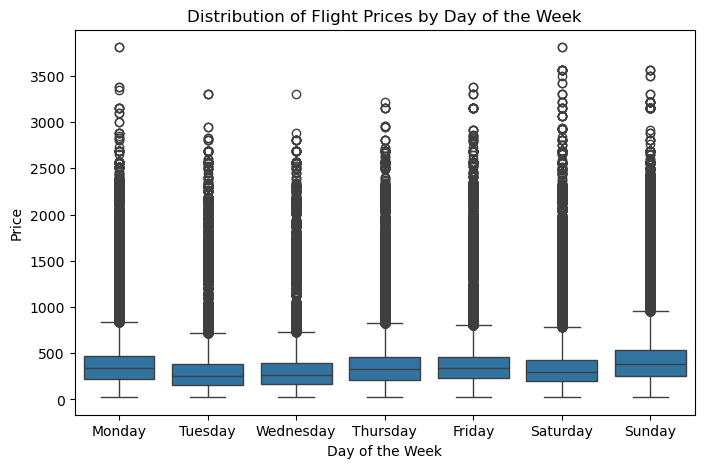

In [123]:
plt.figure(figsize=(8,5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='flight_day_name', y='price', data=df, order=order_days)
plt.title('Distribution of Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price')

From the plot, it is clear that **Sunday flights tend to have higher** median prices compared to other days, while **Tuesday and Wednesday flights generally have lower prices.** The wide boxes and presence of outliers indicate notable price variability within each day.



## Relationship Between Seats Remaining and Price

### 1. Correlation Analysis Between Seats Remaining and Ticket Price

In [141]:
correlation = df['seats_remaining'].corr(df['price'])
rounded_corr = round(correlation, 3)
print("Correlation:", rounded_corr)

Correlation: -0.008


In [130]:
spearman_corr = df['seats_remaining'].corr(df['price'], method='spearman')
print("Spearman correlation:", round(spearman_corr, 3))

Spearman correlation: -0.027


 Two methods to check the relationship between seats remaining and ticket price: Pearson correlation to measure linear association, and Spearman correlation to detect any ranking relationship. Both showed **very weak** correlations, indicating no strong link between these variables."



### 2. Scatter Plot of Seats Remaining vs. Average Ticket Price

   seats_remaining       price
0                0  231.491886
1                1  397.097428
2                2  387.331825
3                3  386.835003
4                4  354.140490


Text(0.5, 1.0, 'Average Flight Price by Seats Remaining')

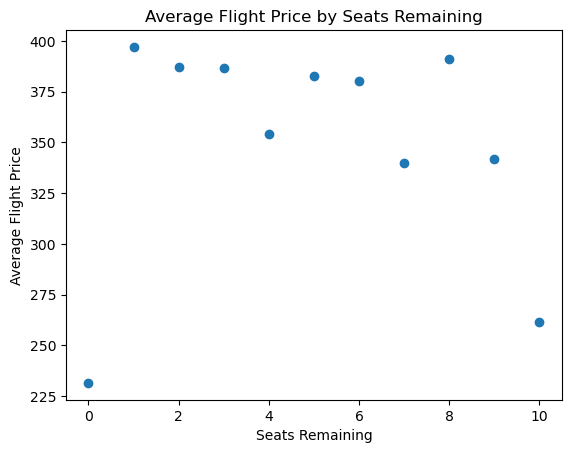

In [139]:
summary = df.groupby('seats_remaining')['price'].mean().reset_index()
print(summary.head())
plt.scatter(summary['seats_remaining'], summary['price'])
plt.xlabel('Seats Remaining')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Price by Seats Remaining')


The plot and correlation show that the number of seats left does not clearly affect the ticket price. The correlation is near zero, meaning almost **no relationship**. The plot also shows prices going up and down with no clear pattern. So, seats left don’t really tell us much about price. Other factors likely have more impact.










## Relationship Between Number of purchable Flights and Ticket Price

### 1. Grouping by Day to Count Unique Flights

In [143]:
flights_per_day = df.groupby('flight_day_name')['legId'].nunique().reset_index(name='num_flights')

### 2. Calculating Average Ticket Price per Day

In [146]:
avg_price_per_day = df.groupby('flight_day_name')['price'].mean().reset_index(name='avg_price')

### 3. Merging Flights Count and Price Data

In [148]:
flights_price = pd.merge(flights_per_day, avg_price_per_day, on='flight_day_name')
print(flights_price)

  flight_day_name  num_flights   avg_price
0          Friday        77198  370.490983
1          Monday        86954  368.626291
2        Saturday        70391  344.427355
3          Sunday        77173  429.354281
4        Thursday        88183  361.855584
5         Tuesday        97306  294.170128
6       Wednesday        92908  302.892275


### 4.  Calculating Correlation

In [151]:
correlation = flights_price['num_flights'].corr(flights_price['avg_price'])
print("Correlation :", round(correlation, 3))


Correlation : -0.631


There is a **moderate negative correlation** between the number of flights and the average ticket price. This means that as the number of flights increases, ticket prices tend to go down. More available flights may lead to more competition, which can help lower prices.

### 5.Visualizing the Relationship

Text(0, 0.5, 'Average Ticket Price')

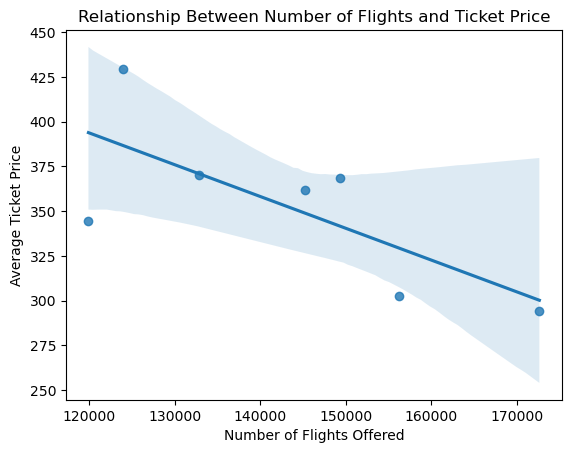

In [157]:
sns.regplot(
    data=summary_df,
    x='flights_offered',
    y='avg_price')

plt.title('Relationship Between Number of Flights and Ticket Price')
plt.xlabel('Number of Flights Offered')
plt.ylabel('Average Ticket Price')


The scatter plot shows a clear negative relationship between the number of flights offered and average ticket price. As more flights are available, ticket prices tend to be lower. This supports the correlation value of -0.63, which suggests a moderate relationship between the two variables.



# Conclusion
## Findings
- Flight prices vary among different times of the day (morning, afternoon, evening, night), showing that departure time affects pricing to a certain extent.
- Prices also change significantly depending on the day of the week, reflecting different demand levels on weekdays versus weekends. Travel patterns show that Fridays and Sundays are among the busiest days for travel in the U.S., as they mark the start and end of weekends when many people take trips or return home. This explains part of the price fluctuations observed on these daysA, as airlines adjust ticket prices based on real-time changes in supply and demand — a practice known as dynamic pricing (Williams, 2020).
- There is an average negative correlation between the number of flights offered and average ticket price, meaning more flights usually lead to lower prices.
-  The effect of seats remaining on price is less clear.This may be due to the absence of actual bookings, and the reported number of seats remaining might not reflect the true availability but rather serve marketing purposes.

## Outcomes
- These findings show that both flight timing and availability influence ticket prices. This information can help travelers find better deals.
- Airlines can use these insights to improve flight scheduling and pricing decisions, matching supply with customer demand more effectively.


## Recommendations
- Future data collection should include actual booking records, cover a full year to capture seasonal variations, and incorporate detailed booking information. This will improve the accuracy and depth of pricing analysis.
= Travelers should consider both flight time and availability when booking to get the best prices.

# Limitiations
- Incomplete booking data: The dataset shows flights offered, not actual bookings, so it may not reflect true demand or sales.
- Seats remaining accuracy: The "seats_remaining" field may not be fully accurate or updated in real time, affecting correlation with price.
- The data covers only six months, which limits our ability to fully understand seasonal effects on flight prices.

### References

- Williams, K. R. (2020). *Dynamic Airline Pricing and Seat Availability*. Cowles Foundation Discussion Paper No. 2103R. Retrieved from [Wharton/SSRN](https://marketing.wharton.upenn.edu/wp-content/uploads/2018/09/10.04.2018-Williams-Kevin-PAPER.pdf?utm_source=chatgpt.com)